In [127]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [128]:
# Numerical libraries
import numpy as np 



from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [129]:
# reading the CSV file into pandas dataframe
bankdata = pd.read_excel("Credit Card Customer Data.xlsx")

In [130]:
bankdata.head()

,SLNO,CustomerKey,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [131]:
# remove SL_No and Customer Key, they do not provide any insght
bankdata.drop(['SLNO','CustomerKey'], axis=1, inplace=True)
bankdata.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [132]:
#check for rows and columns
bankdata.shape

(660, 5)

In [133]:
#checking for null values and data types -- all are of type int64 - no null values
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [134]:
#no null values in the dataset
bankdata.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [135]:
#positive skewness in Avg_Credit-Limit, slight negative skewness in Total_Credit_Cards, positive for the remaining three, zero values for online, bank and total calls made
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


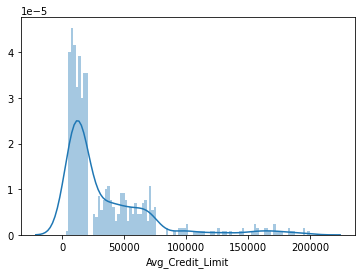

In [136]:
#Credit Limit has a poistive skew, the majority is between 0 and 20K from the look of it possibly 3 clusters
sns.distplot(bankdata['Avg_Credit_Limit'], kde=True, bins=100)





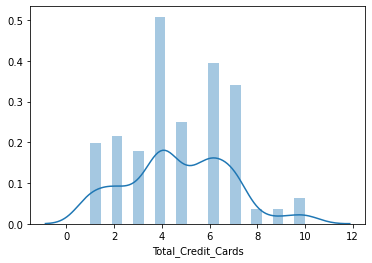

In [137]:
# The number of total credit cards has the highest density around 4, somewhat of a normal distribution, potentially 3 to 4 clusters
sns.distplot(bankdata['Total_Credit_Cards'], kde=True, bins=20)

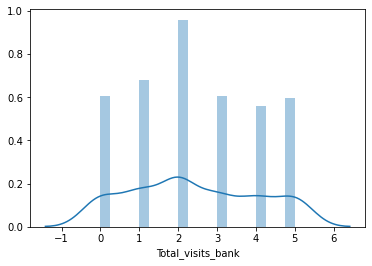

In [138]:
#Highest desnitu around 2 bank visits looks like 1 or 2 clusters
sns.distplot(bankdata['Total_visits_bank'], kde=True, bins=20)

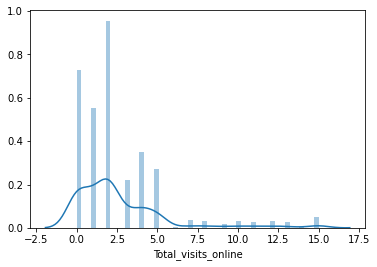

In [139]:
# The majority of visits are around 2 possibly 2 or 3 clusters
sns.distplot(bankdata['Total_visits_online'], kde=True, bins=50)

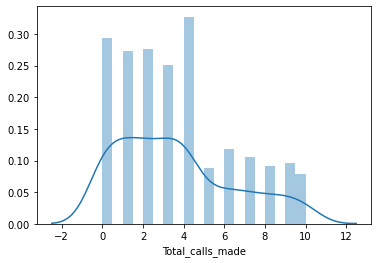

In [140]:
#The highest density arund 4 calls made possibly 2 clusters
sns.distplot(bankdata['Total_calls_made'], kde=True, bins=20)

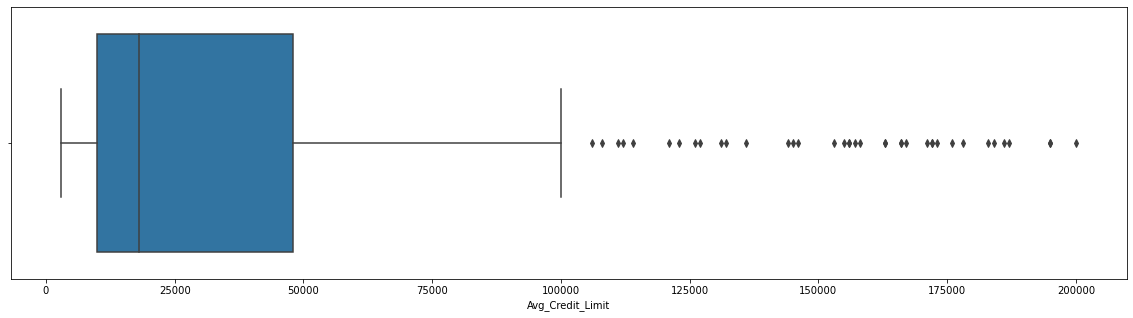

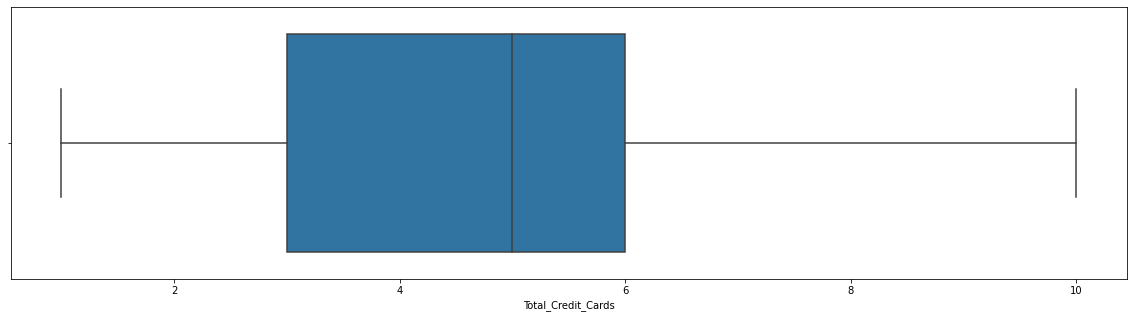

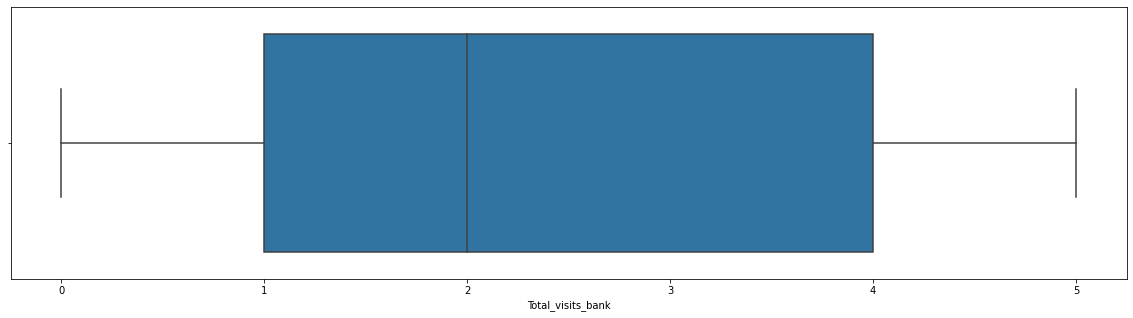

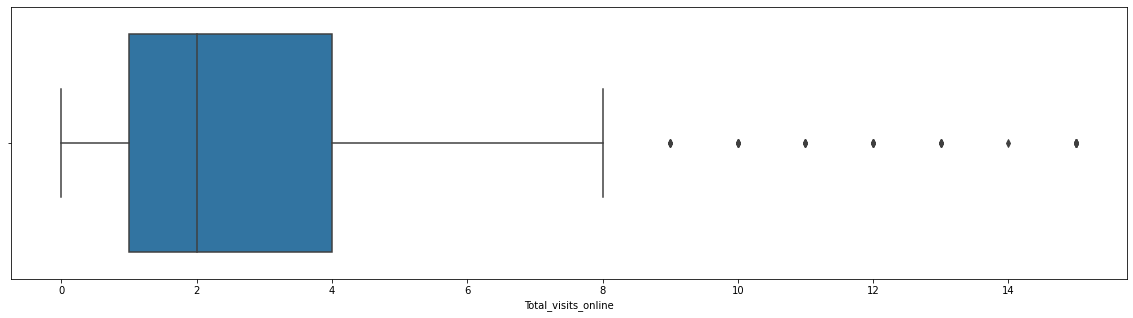

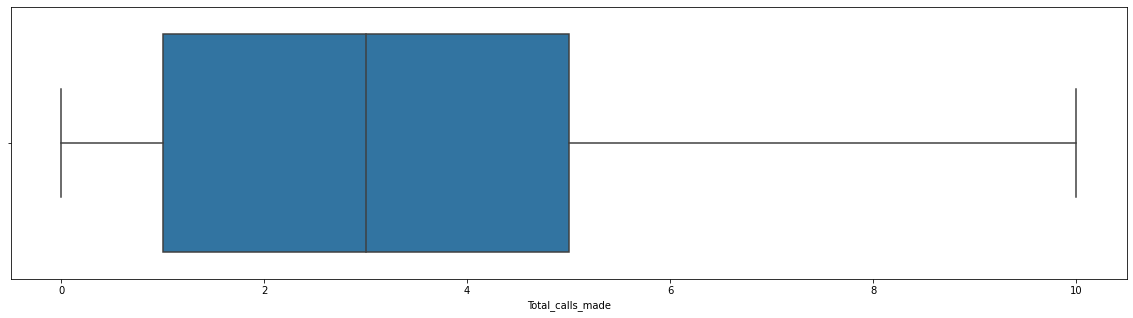

In [141]:
def create_univariate_diagram(dframe):
    numvar = dframe.select_dtypes(include="number")
    numobj = dframe.select_dtypes(include="object")
    for column in numvar.columns:
        plt.figure(figsize=(20,5))
        sns.boxplot(dframe[column])
        plt.show()
    for column in numobj.columns:
        plt.figure(figsize=(20,5))
        sns.countplotdframe([column])
        plt.show()
create_univariate_diagram(bankdata)

In [142]:

print(bankdata.shape)
bankdata_new= bankdata[~((bankdata['Total_visits_online']>8))]
bankdata_new['Avg_Credit_Limit'] = np.log(bankdata_new['Avg_Credit_Limit'])
print(bankdata_new.shape)




(660, 5)
(623, 5)


<ipython-input-142-390cc53d618f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankdata_new['Avg_Credit_Limit'] = np.log(bankdata_new['Avg_Credit_Limit'])


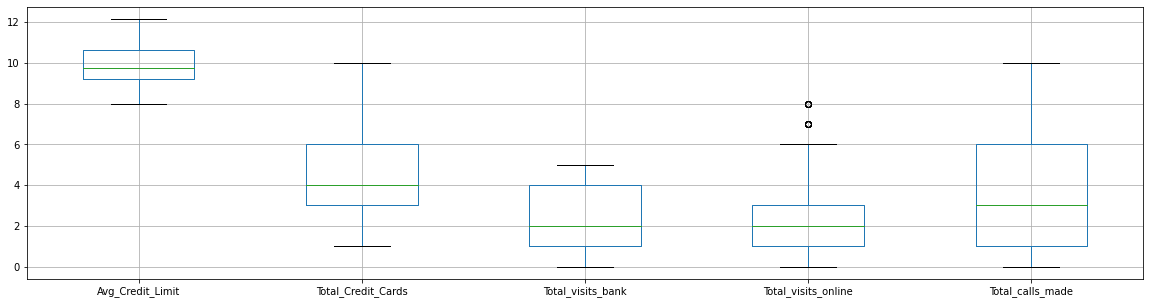

In [143]:
#Removed outliers
bankdata_new.boxplot(figsize=(20,5))

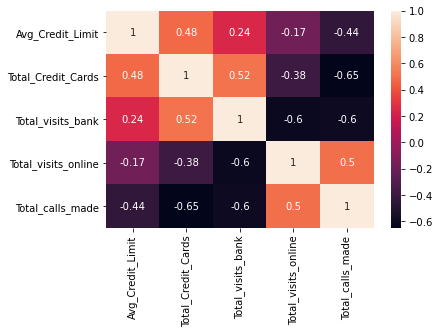

In [144]:

corr = bankdata_new.corr()
sns.heatmap(corr, annot = True)

In [145]:
#No strong correlation
cor = bankdata_new.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor.stack()
cor[(cor < -.7 )| (cor > .7)]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,NaN,NaN,NaN,NaN,NaN
Total_Credit_Cards,NaN,NaN,NaN,NaN,NaN
Total_visits_bank,NaN,NaN,NaN,NaN,NaN
Total_visits_online,NaN,NaN,NaN,NaN,NaN
Total_calls_made,NaN,NaN,NaN,NaN,NaN


In [146]:
#Moderate positive correlation between Total Credit Cards and Avg Credit Limit and Total visits online and Avg Credt Limit negative correlation between online and bank vistis which may indicate that these people prefer mobile banking same for total calls made and online visits, same holds true for total credit cards and total calls made
cor = bankdata_new.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor.stack()
cor[(cor < -.3 )| (cor > .3)]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,NaN,NaN,NaN,NaN,NaN
Total_Credit_Cards,0.481106,NaN,NaN,NaN,NaN
Total_visits_bank,NaN,0.516039,NaN,NaN,NaN
Total_visits_online,NaN,-0.381564,-0.598537,NaN,NaN
Total_calls_made,-0.435789,-0.649794,-0.595957,0.502001,NaN


In [147]:
bankdata_new.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,9.888596,4.470305,2.512039,2.035313,3.714286
std,0.840346,1.957425,1.610686,1.746482,2.872181
min,8.006368,1.000000,0.000000,0.000000,0.000000
25%,9.210340,3.000000,1.000000,1.000000,1.000000
50%,9.740969,4.000000,2.000000,2.000000,3.000000
75%,10.621327,6.000000,4.000000,3.000000,6.000000
max,12.138864,10.000000,5.000000,8.000000,10.000000


In [148]:
# Variables are now scaled
from scipy.stats import zscore

bankdata_z = bankdata_new.apply(zscore)


In [149]:
#created clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(bankdata_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,3115.000000
1,2,1561.636772
2,3,1237.330803
3,4,971.269959
4,5,885.355551
5,6,808.586928
6,7,739.882861
7,8,692.416585
8,9,658.954071
9,10,630.999087


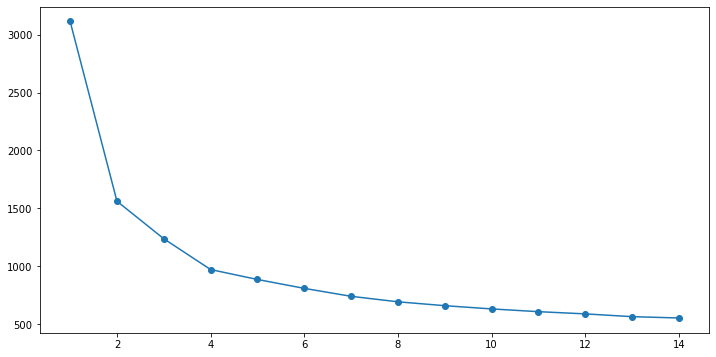

In [150]:
# according to the elbow diagram 2 or 4 clusters seem to be optimal
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [151]:
# I see the major bends at 2 and 4

kmeans2 = KMeans(n_clusters=2, n_init = 5, random_state=12345)
kmeans2.fit(bankdata_z)

KMeans(n_clusters=2, n_init=5, random_state=12345)

In [152]:
# Check the number of data points in each cluster, cluster 0 has 222 data points, cluster 1 has 401 data points
labels = kmeans2.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[222 401]


In [153]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans2.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(bankdata_z) )
centroid_df.transpose()

,0,1
Avg_Credit_Limit,-0.689021,0.381453
Total_Credit_Cards,-1.055754,0.584482
Total_visits_bank,-0.975894,0.540271
Total_visits_online,0.859974,-0.476095
Total_calls_made,1.105658,-0.612110


In [154]:
bankdata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.934482,-1.263032,-0.939509,-0.593276,-1.294232
2,1.108984,1.293397,-0.939509,0.552804,0.099556
3,0.500620,0.270826,-0.939509,-0.593276,0.099556
5,0.017735,-0.751746,-1.560861,-0.593276,1.493345
7,-0.324877,-0.751746,-1.560861,-0.593276,-0.945785


In [155]:
# Add cluster number to original bank data

predictions = kmeans2.predict(bankdata_z)
predictions
bankdata_z["group"] = predictions
bankdata_z['group'] = bankdata_z['group'].astype('category')
bankdata_z.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ef7a8820>,
      dtype=object)

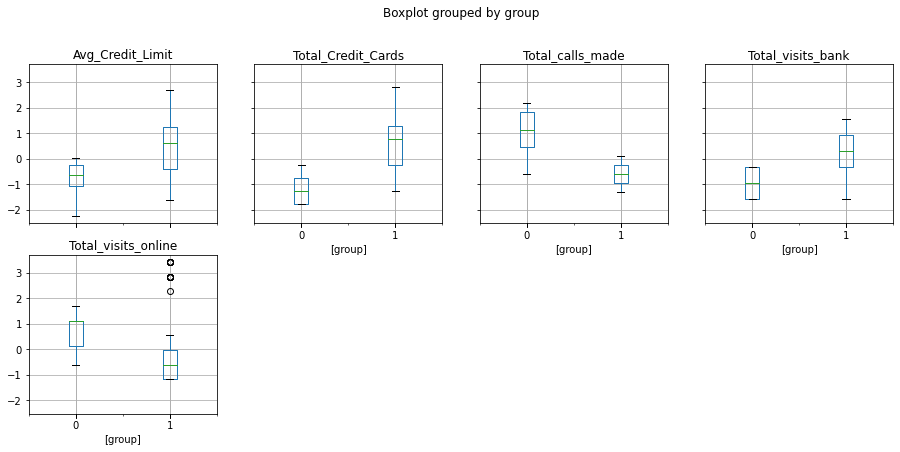

In [156]:
# Visualize the centers

bankdata_z["group"] = predictions
bankdata_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [157]:
# I see the major bends at 2 and 4

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(bankdata_z)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [158]:
# Check the number of data points in each cluster cluster 0 has 212, cluster 1 has 222, cluster 2 has 175 data points and 3 has 14 data points
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[219 222 168  14]


In [159]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(bankdata_z) )
centroid_df.transpose()

,0,1,2,3
Avg_Credit_Limit,1.057487,-6.890210e-01,-0.658103,2.281021
Total_Credit_Cards,0.550982,-1.055754e+00,0.505165,2.060326
Total_visits_bank,0.552872,-9.758944e-01,0.665652,-1.161421
Total_visits_online,-0.611592,8.599741e-01,-0.593276,3.049621
Total_calls_made,-0.578245,1.105658e+00,-0.624301,-0.995563
group,1.000000,2.220446e-16,1.000000,1.000000


In [160]:
# Add cluster number to original bank data

predictions = kmeans.predict(bankdata_z)
predictions
bankdata_z["group"] = predictions
bankdata_z['group'] = bankdata_z['group'].astype('category')
bankdata_z.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ee91a4c0>,
      dtype=object)

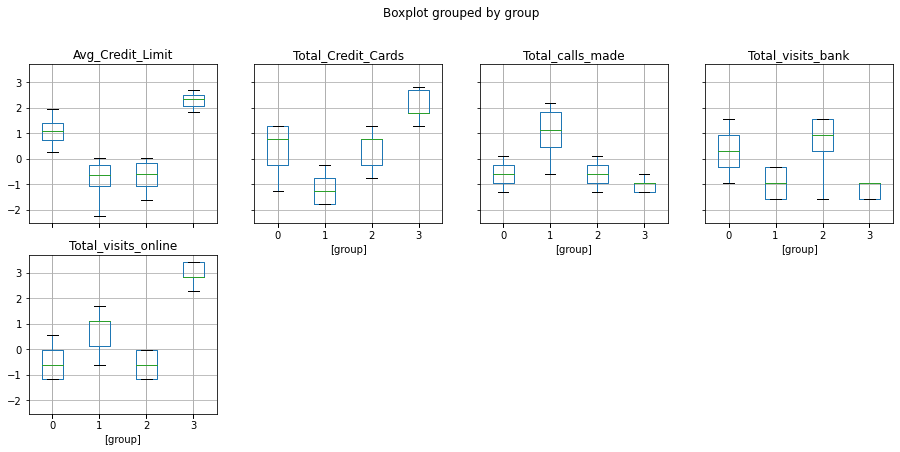

In [161]:
# Visualize the centers

bankdata_z["group"] = predictions
bankdata_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [162]:
# Used Agglomerative clustering with the avearge method and euclidean distance calculation
model_agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model_agg.fit(bankdata_z)

AgglomerativeClustering(linkage='average')

In [163]:
#Average is the best of complete and single method

Z_matrix = linkage(bankdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_matrix , pdist(bankdata_z))

c

0.8811037279966653

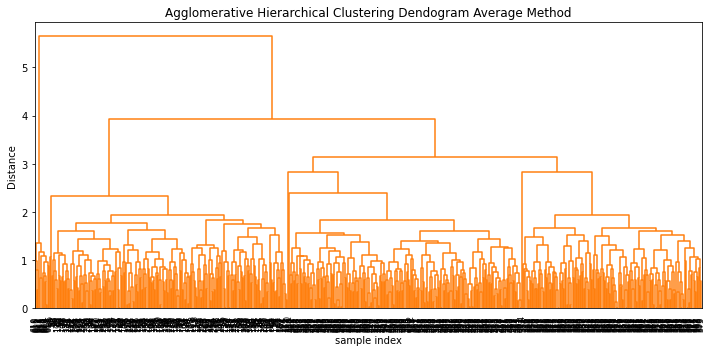

In [164]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram Average Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_matrix, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

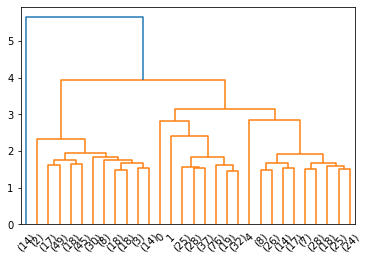

In [165]:
dendrogram(
    Z_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
)
plt.show()

In [166]:
# Complete linkage is not as good as average as average is closer to 1
Z_matrix_complete = linkage(bankdata_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z_matrix_complete , pdist(bankdata_z))

c

0.8489840328222763

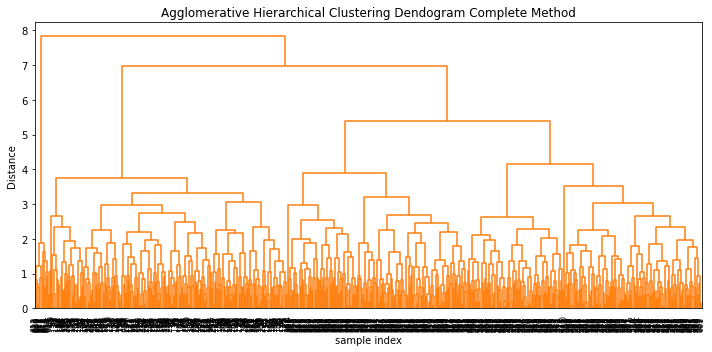

In [167]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram Complete Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_matrix_complete, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

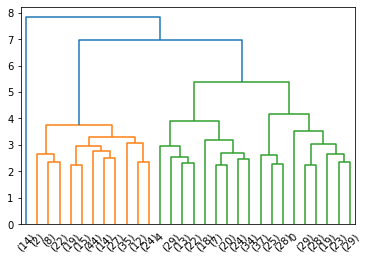

In [168]:
dendrogram(
    Z_matrix_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
)
plt.show()

In [169]:
# Single method is the worst of all 3
Z_matrix_single = linkage(bankdata_z, metric='euclidean', method='single')
c, coph_dists = cophenet(Z_matrix_single , pdist(bankdata_z))

c

0.7252380531958131

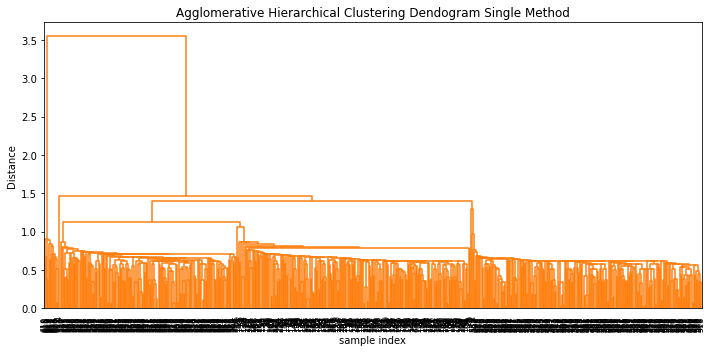

In [170]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram Single Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_matrix_single, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

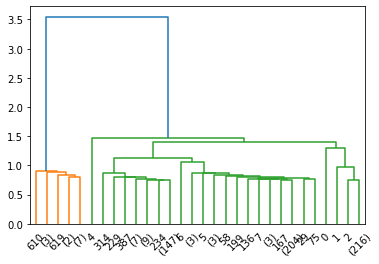

In [171]:
dendrogram(
    Z_matrix_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
)
plt.show()

In [172]:
# Used Agglomerative clustering with the avearge method and euclidean distance calculation
model_agg4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model_agg4.fit(bankdata_z)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [173]:
# Agglomerative 4 clusters seems to be the best option, it seems to be better than Kmeans
from sklearn.metrics import silhouette_samples, silhouette_score
score1 = silhouette_score(bankdata_z, kmeans.labels_, metric='euclidean') # 4 clusters
score2 = silhouette_score(bankdata_z, model_agg.labels_, metric='euclidean') # 2 clusters
score4 = silhouette_score(bankdata_z, model_agg4.labels_, metric='euclidean') # 4 clusters
score3 = silhouette_score(bankdata_z, kmeans2.labels_, metric='euclidean') # 2 clusters
#
# Print the score
#
print('Silhouette Score for KMeans, 4 clusters: %.3f' % score1)
print('Silhouette Score for KMeans 2 clusters: %.3f' % score3)
print('Silhouette Score for Agglomerative 2 clusters: %.3f' % score2)
print('Silhouette Score for Agglomerative 4 clusters: %.3f' % score4)


Silhouette Score for KMeans, 4 clusters: 0.488
Silhouette Score for KMeans 2 clusters: 0.416
Silhouette Score for Agglomerative 2 clusters: 0.471
Silhouette Score for Agglomerative 4 clusters: 0.488
